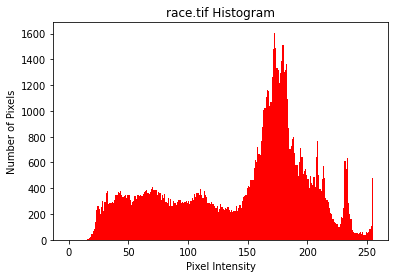

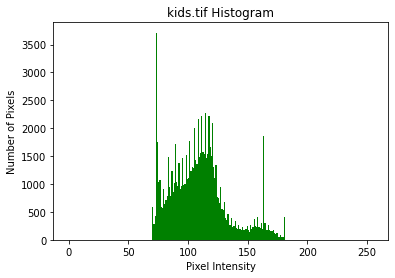

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

raceim = Image.open("race.tif")
kidsim = Image.open("kids.tif")
# plt.figure()
# plt.imshow(kidsim)

x1 = np.array(raceim)
x2 = np.array(kidsim)

plt.figure()
plt.hist(x1.flatten(),bins=np.linspace(0,255,256),color='red')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('race.tif Histogram')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("racehist.tif")
png1.close()

plt.figure()
plt.hist(x2.flatten(),bins=np.linspace(0,255,256),color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('kids.tif Histogram')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("kidshist.tif")
png1.close()

# save to tiffs

In [64]:
def equalize(X):
    L = 256
    m, n = np.shape(X)
    shape = (m, n)
    Z = np.zeros(shape)
    Fx_hat = np.zeros((1,256))
    
    h = np.histogram(X,bins=np.linspace(0,255,256))
    
    Fx_hat = np.cumsum(h[0])/np.sum(h[0])
    
    Ymax = np.max(Fx_hat)
    Ymin = np.min(Fx_hat)
    
    for i in range(m):
        for j in range(n):
            Z[i,j] = (L - 1)*((Fx_hat[X[i,j]+1] - Ymin)/(Ymax - Ymin))
            
    return Z, Fx_hat

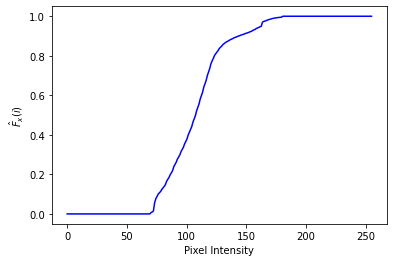

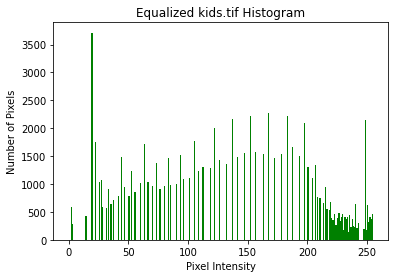

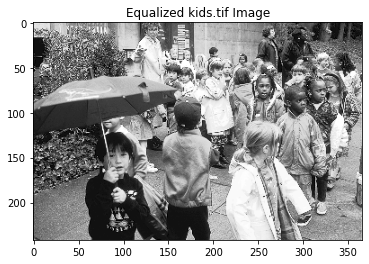

In [65]:
z, fxhat = equalize(x2)

plt.figure()
plt.plot(np.linspace(0,255,255),fxhat,color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel(r"""$\^F_{x}(i)$""")
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("Fxhat.tif")
png1.close()

plt.figure()
plt.hist(z.flatten(),bins=np.linspace(0,255,256),color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('Equalized kids.tif Histogram')
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("kids_equalized_hist.tif")
png1.close()

plt.figure()
plt.imshow(z,cmap=plt.cm.gray)
plt.title('Equalized kids.tif Image')
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("kids_equalized_image.tif")
png1.close()

In [66]:
def stretch(X, T1, T2):
    m, n = np.shape(X)
    shape = (m,n)
    output = np.zeros(shape)
    
    for i in range(m):
        for j in range(n):
            if X[i,j] > T1:
                if X[i,j] < T2:
                    # output/X = rise/run --> output = rise/run * X
                    output[i,j] = (255/(T2-T1))*(X[i,j] - T1)
                else:
                    output[i,j] = 255
                
    return output

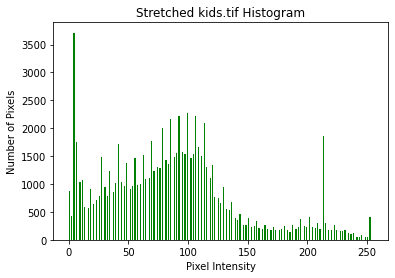

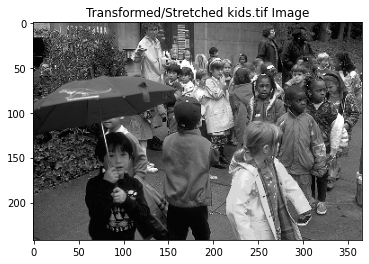

In [67]:
hist = np.histogram(x2,bins=np.linspace(0,255,256))
# print(hist[0])
# Tmin = np.min(hist[0])
# Tmax = np.max(hist[0])
# i = 0
# a = 0
# Tmin = 0
# while a == 0:
#     if hist[0][i] == 0:
#         i += 1
#     else:
#         Tmin = i
#         a = 1
        
# j = 0
# b = 0
# Tmax = 0
# while a == 0:
#     if hist[0][-1-j] == 0:
#         j += 1
#     else:
#         Tmax = np.size(hist[0] - j)
#         b = 1
        
out = stretch(x2, 71, 181)

plt.figure()
plt.hist(out.flatten(),bins=np.linspace(0,255,256),color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.title('Stretched kids.tif Histogram')
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("kids_stretched_hist.tif")
png1.close()

plt.figure()
plt.imshow(out,cmap=plt.cm.gray)
plt.title('Transformed/Stretched kids.tif Image')
png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("kids_stretched_image.tif")
png1.close()